### <font color=gray size=4>约会数据分析 —— 何姝娴 19210980041</font>

# > Part 1：读入数据

#### 读入数据，提取需要变量

In [474]:
import numpy as np
import pandas as pd
import matplotlib
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.globals import ThemeType
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# 决策树的可视化所需↓
from IPython.display import Image  
from sklearn import tree
import pydotplus 
import os
os.environ["PATH"] += os.pathsep + 'E:/....../Graphviz2.38/bin'  # 环境变量设置

In [475]:
raw_data = pd.read_csv('Speed Dating Data.csv', encoding = 'gbk')
raw_data

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [476]:
data = raw_data[['dec', 'iid', 'pid', 'gender', 'age', 'race', 'field', 'sports', 'tvsports', 'exercise', 'dining', 
                'museums', 'art', 'hiking', 'gaming', 'clubbing', 'tv', 'theater', 'movies', 'concerts', 'shopping', 'yoga', 
                'age_o', 'race_o', 'samerace','go_out', 'date', 'imprelig', 'imprace', 'attr1_1', 'shar1_1', 
                'fun1_1', 'sinc1_1', 'amb1_1', 'intel1_1', 'attr', 'shar', 'fun', 'sinc', 'amb', 'intel', 'like', 'prob'] ]

# > Part 2：描述分析

### 2.1 最普遍的十种从事领域中男女的分布比较

In [477]:
# 所有从事领域的频次
data['field'].value_counts()

Business                  521
MBA                       468
Law                       462
Social Work               378
International Affairs     252
                         ... 
math of finance             6
Fundraising Management      6
art history                 6
marine geophysics           5
theory                      5
Name: field, Length: 259, dtype: int64

In [478]:
# 最普遍的十种从事领域
data['field'].value_counts()[:10]

Business                  521
MBA                       468
Law                       462
Social Work               378
International Affairs     252
Electrical Engineering    164
Psychology                139
law                       123
Finance                   113
business                  110
Name: field, dtype: int64

发现排第一位和第十位的均为business，只不过大小写有区别。因此把所有单词都转化为小写。   

In [479]:
# 把从事领域的单词转化为小写
data['field'] = data['field'].apply(lambda x: str(x).lower())

In [480]:
# 再次查看最普遍的十种从事领域
data['field'].value_counts()[:10]

business                  631
law                       604
mba                       468
social work               414
international affairs     287
electrical engineering    223
psychology                177
sociology                 140
engineering               127
education                 123
Name: field, dtype: int64

In [481]:
# 保存最普遍的十种从事领域，为了画图效果，采用逆序
field_list = list(data['field'].value_counts()[:10].index)
field_list.reverse()
field_list

['education',
 'engineering',
 'sociology',
 'psychology',
 'electrical engineering',
 'international affairs',
 'social work',
 'mba',
 'law',
 'business']

In [482]:
# 统计男性与女性分别在最普遍的十种从事领域中的人数
field_f = []
field_m = []

for f in field_list:
    field_f.append( len(data[(raw_data.gender == 0) & (data.field == f)]) )
    field_m.append( len(data[(raw_data.gender == 1) & (data.field == f)]) )

In [488]:
# 画图
bar=(
     Bar(init_opts=opts.InitOpts(width="800px",height="500px"))
        .add_xaxis([x.replace(' ','\n') for x in field_list]) # 单词空格换行，易于展示
        .add_yaxis("女性", field_f, gap="0%")
        .add_yaxis("男性", field_m, gap="0%")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(title_opts=opts.TitleOpts(title="男性与女性在top10从事领域的分布柱状图"), 
                         xaxis_opts=opts.AxisOpts(name="人数",splitline_opts=opts.SplitLineOpts(is_show=True)),
                         yaxis_opts=opts.AxisOpts(name="从事领域")
                        )
     )
bar.reversal_axis() 
bar.render_notebook()

<font color=red size=2>ps：在ipynb里运行代码可以顺利显示图片，但导出为html以后，有的浏览器似乎无法渲染显示上图，在此再粘贴一下截图：</font>  
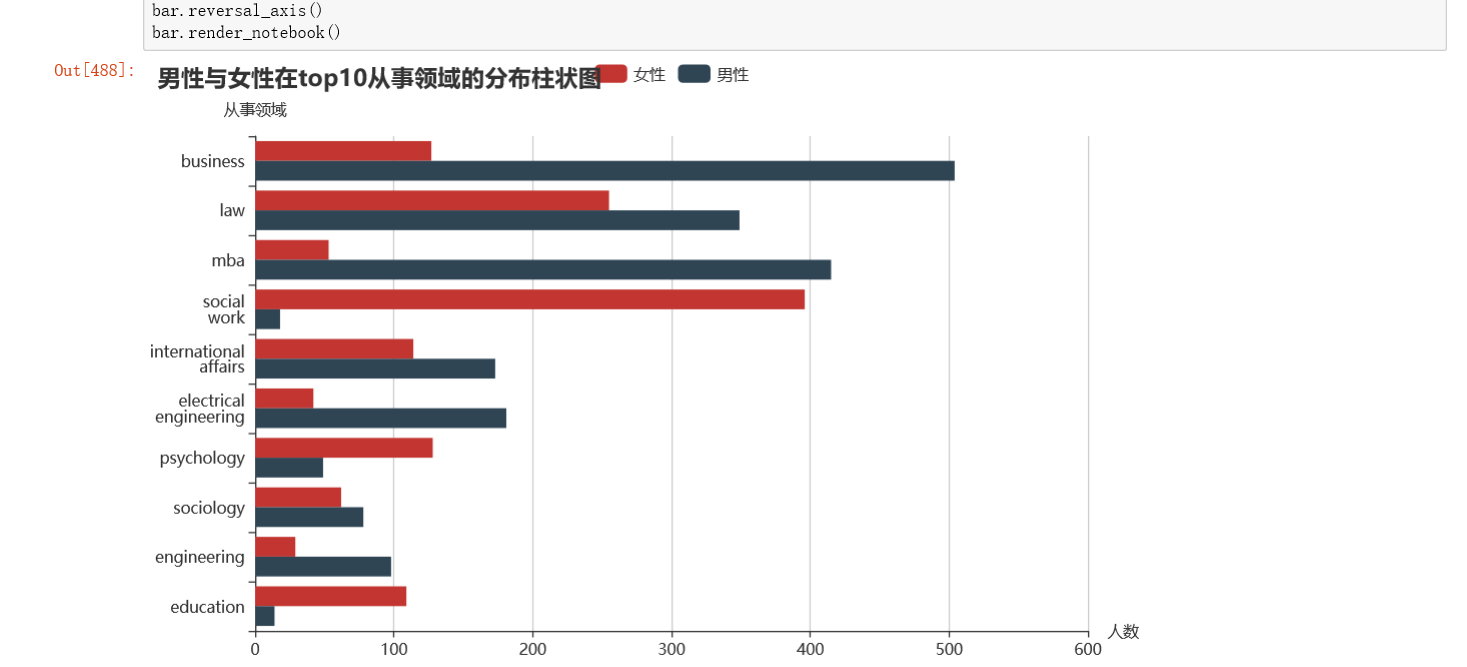

约会对象的从事领域对于约会双方的匹配度有明显影响。从上图可看出男性与女性对职业选择的倾向，男性与女性在从事领域的分布上有非常大的差异，如business、MBA、engineering等领域内绝大部分为男性，而social work、psychology、education等领域内绝大部分为女性。

## 2.2 男性与女性对于年龄差的感知差异

In [484]:
data['age_diff'] = data['age'] - data['age_o']

In [485]:
data.head()

,dec,iid,pid,gender,age,race,field,sports,tvsports,exercise,...,intel1_1,attr,shar,fun,sinc,amb,intel,like,prob,age_diff
0,1,1,11.0,0,21.0,4.0,law,9.0,2.0,8.0,...,20.0,6.0,5.0,7.0,9.0,6.0,7.0,7.0,6.0,-6.0
1,1,1,12.0,0,21.0,4.0,law,9.0,2.0,8.0,...,20.0,7.0,6.0,8.0,8.0,5.0,7.0,7.0,5.0,-1.0
2,1,1,13.0,0,21.0,4.0,law,9.0,2.0,8.0,...,20.0,5.0,7.0,8.0,8.0,5.0,9.0,7.0,NaN,-1.0
3,1,1,14.0,0,21.0,4.0,law,9.0,2.0,8.0,...,20.0,7.0,8.0,7.0,6.0,6.0,8.0,7.0,6.0,-2.0
4,1,1,15.0,0,21.0,4.0,law,9.0,2.0,8.0,...,20.0,5.0,6.0,7.0,6.0,6.0,7.0,6.0,6.0,-3.0


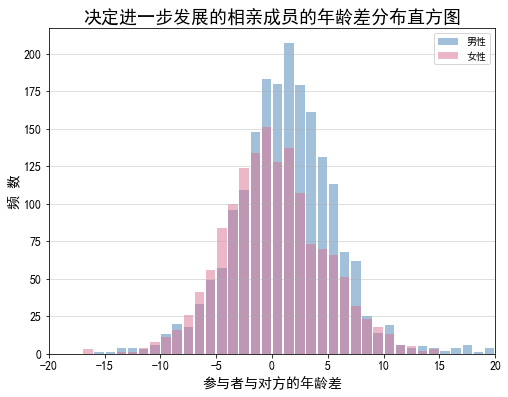

男性相亲对象在决定进一步发展时，自己与对方年龄差的均值： 0.67
女性相亲对象在决定进一步发展时，自己与对方年龄差的均值： -0.28


In [489]:
# 解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 画图
plt.figure(figsize=(8,6))
plt.hist(x = data[(data.gender == 1) & (data.dec ==1)]['age_diff'], 
         bins=40, range=(-20,20), color='steelblue', alpha=0.5, rwidth=0.85, label = '男性') # 男性看对方
plt.hist(x = data[(data.gender == 0) & (data.dec ==1)]['age_diff'], 
         bins=40, range=(-20,20),color='palevioletred', alpha=0.5, rwidth=0.85, label = '女性') # 女性看对方

plt.xlabel('参与者与对方的年龄差',fontsize=14)
plt.ylabel('频 数',fontsize=14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title('决定进一步发展的相亲成员的年龄差分布直方图',fontsize=18)
plt.grid(axis='y', alpha=0.5)
plt.xlim(-20,20)
plt.legend()
plt.show()

print('男性相亲对象在决定进一步发展时，自己与对方年龄差的均值：', round(data[(data.gender == 1) & (data.dec == 1)]['age_diff'].mean(),2))
print('女性相亲对象在决定进一步发展时，自己与对方年龄差的均值：', round(data[(data.gender == 0) & (data.dec == 1)]['age_diff'].mean(),2))

由上图可见，在0轴右侧的正值范围内，代表男性的蓝色柱明显高于代表女性的粉色柱，在0轴左侧的负值范围内则相反。可见，在决定进一步发展的相亲成员中，男方年龄比女方大是更常见的情况。 

此外，代表女性的粉色柱状图关于0轴的对称性高于蓝色柱状图，蓝色柱状图有明显的偏右倾向，而0.67、-0.28的均值也再次印证了这点，即总体来说，女性并不特别需要男方比自己年长，男性则更加倾向与年龄比自己小的约会对象进一步发展。

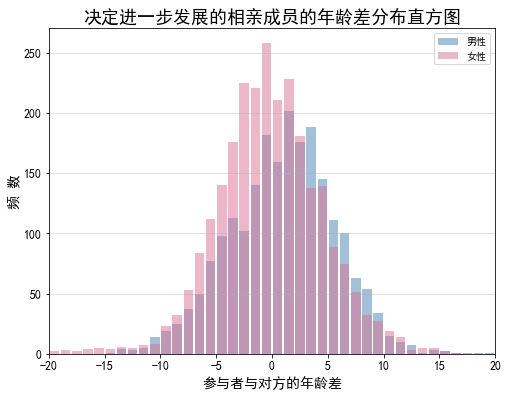

男性相亲对象在决定进一步发展时，自己与对方年龄差的均值： 0.39
女性相亲对象在决定进一步发展时，自己与对方年龄差的均值： -0.66


In [490]:
plt.figure(figsize=(8,6))
plt.hist(x = data[(data.gender == 1) & (data.dec == 0)]['age_diff'], 
         bins=40, range=(-20,20), color='steelblue', alpha=0.5, rwidth=0.85, label = '男性') # 男性看对方
plt.hist(x = data[(data.gender == 0) & (data.dec == 0)]['age_diff'], 
         bins=40, range=(-20,20),color='palevioletred', alpha=0.5, rwidth=0.85, label = '女性') # 女性看对方

plt.xlabel('参与者与对方的年龄差',fontsize=14)
plt.ylabel('频 数',fontsize=14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title('决定进一步发展的相亲成员的年龄差分布直方图',fontsize=18)
plt.grid(axis='y', alpha=0.5)
plt.xlim(-20,20)
plt.legend()
plt.show()

print('男性相亲对象在决定进一步发展时，自己与对方年龄差的均值：', round(data[(data.gender == 1) & (data.dec == 0)]['age_diff'].mean(),2))
print('女性相亲对象在决定进一步发展时，自己与对方年龄差的均值：', round(data[(data.gender == 0) & (data.dec == 0)]['age_diff'].mean(),2))

在不决定进一步发展时，男性视角来看，年龄差由0.67缩小至0.39，再次印证了男性更倾向与年龄比自己小的约会对象进一步发展；而女性视角来看，在不决定进一步发展时，年龄差（绝对值）由-0.28扩大至-0.66，说明女性总体上来说更倾向于年龄相近的对象。

## > Part 3：建模 
### —— 怎样的男性与女性在相亲中更容易获得进一步发展的机会？

### 3.1 数据预处理

In [455]:
# 去掉含有缺失值的行
data = data.dropna(axis=0, how='any') 

In [453]:
# 添加约会对象填写的信息
data_matched = pd.DataFrame(columns = ['p_dec'] + ['p_'+x for x in ['attr', 'shar', 'fun', 'sinc', 'amb', 'intel']] + list(data.columns))

for index, row in data.iterrows():
    matched_row = data[(data.iid == row.pid) & (data.pid == row.iid)] # 找到对方填写的数据    
    if matched_row.shape[0] != 0:
        # 对方对于进一步发展的决定、对于自己约会后印象的打分，不包含like和prob
        partner_dec = pd.Series({
            'p_dec': int(matched_row.dec),
            'p_attr': int(matched_row.attr),
            'p_shar': int(matched_row.shar),
            'p_fun': int(matched_row.fun),
            'p_sinc': int(matched_row.sinc),
            'p_amb': int(matched_row.amb),
            'p_intel': int(matched_row.intel)
    }) 
        new_row = partner_dec.append(row)
        data_matched = data_matched.append(new_row, ignore_index = True)

p_dec为对方是否想与自己进一步发展的决定。

In [459]:
data_matched.describe().iloc[:,:20]

,pid,age,race,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,tv,theater,movies,concerts,shopping,yoga,age_o,race_o
count,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000
mean,283.102791,26.181915,2.804309,6.463794,4.576298,6.280290,7.858001,7.034087,6.755210,5.642706,3.901978,5.782586,5.370187,6.789297,7.930943,6.846167,5.722536,4.368068,26.181915,2.804309
std,159.113948,3.433951,1.262365,2.585273,2.808451,2.433797,1.702365,2.049400,2.253056,2.578298,2.606387,2.508257,2.528065,2.265134,1.718895,2.166168,2.626052,2.749474,3.433951,1.262365
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,1.000000
25%,156.250000,24.000000,2.000000,5.000000,2.000000,5.000000,7.000000,6.000000,5.000000,3.000000,2.000000,4.000000,3.000000,5.000000,7.000000,5.000000,4.000000,2.000000,24.000000,2.000000
50%,278.000000,26.000000,2.000000,7.000000,4.000000,7.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,6.000000,7.000000,8.000000,7.000000,6.000000,4.000000,26.000000,2.000000
75%,414.000000,28.000000,4.000000,9.000000,7.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6.000000,8.000000,7.000000,9.000000,9.000000,9.000000,8.000000,7.000000,28.000000,4.000000
max,552.000000,55.000000,6.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,55.000000,6.000000


发现gaming有异常值，最大值为14，将取值为14的样本点改为10。

In [462]:
print('对gaming打分异常的数量：',len(data_matched[data_matched.gaming > 10].gaming))
print('对gaming打分异常的异常值：',data_matched[data_matched.gaming > 10].gaming.unique())

对gaming打分异常的数量： 63
对gaming打分异常的异常值： [14.]


In [463]:
data_matched.loc[data_matched.gaming > 10, 'gaming'] = 10 # 将取值为14的样本点改为10

In [464]:
data_matched.describe().iloc[:,20:]

,go_out,date,imprelig,imprace,attr1_1,shar1_1,fun1_1,sinc1_1,amb1_1,intel1_1,attr,shar,fun,sinc,amb,intel,like,prob,age_diff
count,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000
mean,2.139880,4.975450,3.625751,3.855175,22.185265,11.782739,17.367038,17.494394,10.803931,20.401692,6.210774,5.501678,6.433416,7.190657,6.786206,7.401713,6.156870,5.278523,0.000000
std,1.108909,1.433048,2.832545,2.874740,12.033672,6.247639,6.071941,7.030980,6.089854,6.736864,1.936203,2.138766,1.942009,1.729394,1.789731,1.524229,1.824828,2.129414,4.565022
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000
25%,1.000000,4.000000,1.000000,1.000000,15.000000,10.000000,15.000000,15.000000,5.000000,17.357500,5.000000,4.000000,5.000000,6.000000,6.000000,7.000000,5.000000,4.000000,-3.000000
50%,2.000000,5.000000,3.000000,3.000000,20.000000,10.260000,18.000000,18.000000,10.000000,20.000000,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,0.000000
75%,3.000000,6.000000,6.000000,6.000000,25.000000,15.380000,20.000000,20.000000,15.000000,25.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,3.000000
max,7.000000,7.000000,10.000000,10.000000,100.000000,30.000000,50.000000,47.000000,53.000000,50.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,28.000000


发现约会前的期望打分并不是十分制，且无法保证对同一项打分时、不同的人认为的满分是否一致，因此无法放缩至0~10，在此弃用这些变量。

此外，like（好感打分）和prob（评估成功率）直接体现了对方是否愿意进一步发展的决定，在此弃用。

最终选取变量列表如下，其中p_dec为对方是否愿意与自己进一步发展的指标，为因变量，其余为自变量：

In [465]:
DATA = data_matched[['p_dec', 'gender','age','race', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
       'gaming', 'clubbing', 'tv', 'theater', 'movies', 'concerts', 'shopping',
       'yoga', 'age_o', 'race_o', 'samerace', 'go_out', 'date', 'imprelig',
       'imprace', 'age_diff', 'p_attr', 'p_shar', 'p_fun', 'p_sinc', 'p_amb', 'p_intel']]

In [466]:
# 对于分类变量race产生哑变量，再删去原先的race列
from sklearn import preprocessing

race_dum = pd.get_dummies(DATA['race'].astype('int32'),prefix = 'race')
DATA = pd.concat([DATA,race_dum], axis = 1)
DATA = DATA.drop(['race'], axis = 1)

raceo_dum = pd.get_dummies(DATA['race_o'].astype('int32'),prefix = 'race_o')
DATA = pd.concat([DATA,raceo_dum], axis = 1)
DATA = DATA.drop(['race_o'], axis = 1)

### 3.2 建模
根据上述描述性分析，可以看出男女自身特质的差异、以及相亲中对于对方期望的差异。因此按性别将数据集分为两份，对男性与女性“怎样的特质在相亲中更容易获得进一步发展的机会？”分别进行建模。
#### 3.2.0 将数据集分为训练集、测试集（男女分开）；模型拟合、评估、解析等过程定义封装

In [467]:
DATAF = DATA[DATA.gender == 0] # 女
DATAM = DATA[DATA.gender == 1] # 男

In [468]:
# 女
XF_train, XF_test, yF_train, yF_test = train_test_split(DATAF.iloc[:,1:], DATAF.iloc[:,0].astype('int32'), random_state=0)
# 男
XM_train, XM_test, yM_train, yM_test = train_test_split(DATAM.iloc[:,1:], DATAM.iloc[:,0].astype('int32'), random_state=0)

In [469]:
def clf_Evaluate(y_,y_pred,method):
    
    '''定义评价指标'''
    
    confusionmatrix = confusion_matrix(y_, y_pred)
    print('混淆矩阵:\n\n',confusionmatrix)
    print('\nClassification report:\n\n',classification_report(y_, y_pred))
    
    result = pd.DataFrame(columns = ['accuracy','precision','recall','f1'])
    score_list = {
        'accuracy': round(accuracy_score(y_, y_pred),4),
        'precision': round(precision_score(y_, y_pred),4),
        'recall': round(recall_score(y_, y_pred),4),
        'f1': round(f1_score(y_, y_pred),4)
    }
    result = result.append(score_list, ignore_index=True)
    result.index = pd.Series([method])
    print('='*60, '\n', result)
    return result

In [470]:
def explain(clf):
    
    '''显示分类器所用特征的重要性、可视化分类器'''
    
    try:
        # 特征重要性输出
        print('降序显示分类器所用特征的重要性：')
        importances = clf.feature_importances_
        indices = np.argsort(importances)[::-1]
        for f in range(sum(clf.feature_importances_ != 0)): # 输出有用变量（重要性不为0）的变量，降序显示
            print("%2d) %-*s %f" % (f + 1, 30, list(DATA.columns[1:])[indices[f]], importances[indices[f]]))
    except:
        print('此方法不支持输出特征重要性。')
        
    try:
        # 决策树的可视化
        dot_data = tree.export_graphviz(clf,feature_names=list(DATA.columns[1:]),class_names=['p_dec:0','p_dec:1'], 
                                 filled=True, rounded=True,  
                                 special_characters=True)  
        graph = pydotplus.graph_from_dot_data(dot_data)  
        return Image(graph.create_png()) 
    except:
        print('此方法不支持可视化。')

In [471]:
def model(gender, method, clf):
    
    '''模型拟合、预测、评估、结果解析'''
    
    flag = gender == 'MALE'
    clf = clf.fit(XM_train, yM_train) if flag else clf.fit(XF_train, yF_train) # 模型拟合
    print(gender + ' | 分类器在测试集上评估结果:') 
    print('='*60)
    y_pred = clf.predict(XM_test) if flag else clf.predict(XF_test) # 预测
    evalutation = clf_Evaluate(yM_test, y_pred, method + ' | ' + gender) if flag else clf_Evaluate(yF_test, y_pred, method + ' | ' + gender) # 评估
    print('='*60)
    return evalutation, explain(clf) # 结果解析

#### 3.2.1 决策树

FEMALE | 分类器在测试集上评估结果:
混淆矩阵:

 [[276  78]
 [ 90 264]]

Classification report:

               precision    recall  f1-score   support

           0       0.75      0.78      0.77       354
           1       0.77      0.75      0.76       354

   micro avg       0.76      0.76      0.76       708
   macro avg       0.76      0.76      0.76       708
weighted avg       0.76      0.76      0.76       708

               accuracy  precision  recall      f1
决策树 | FEMALE    0.7627     0.7719  0.7458  0.7586
降序显示分类器所用特征的重要性：
 1) p_attr                         0.804848
 2) p_shar                         0.118662
 3) p_fun                          0.028597
 4) p_intel                        0.021956
 5) tv                             0.015171
 6) clubbing                       0.009281
 7) hiking                         0.001485


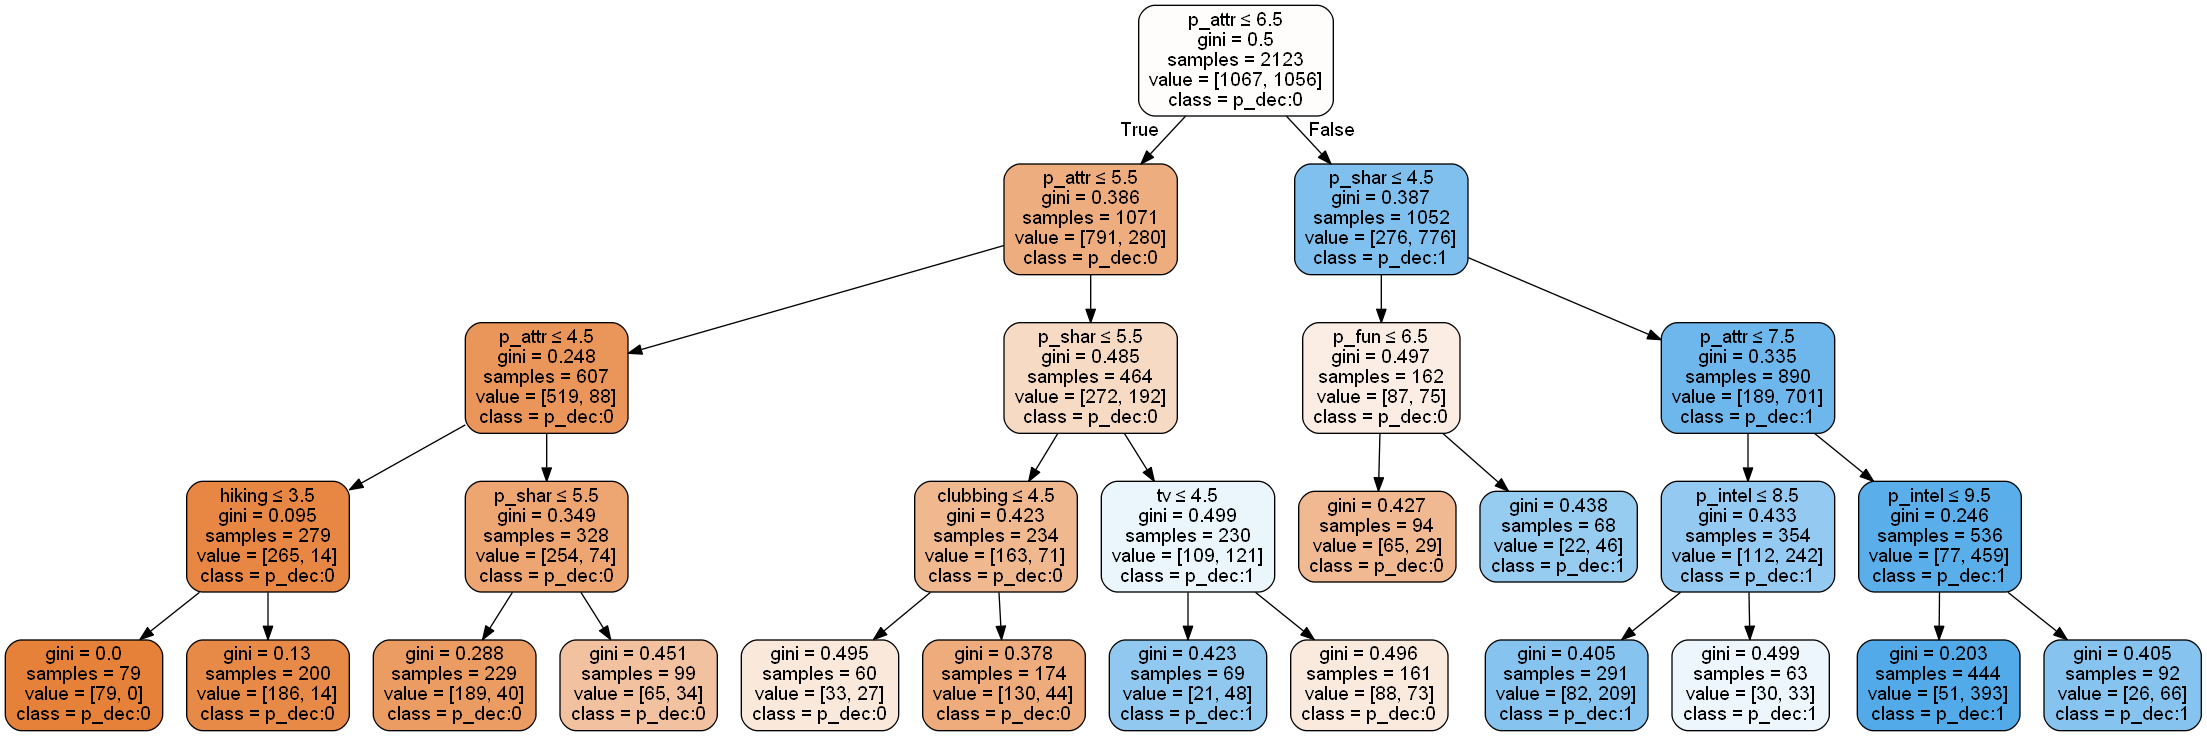

In [374]:
evaluation_dst_f, graph = model('FEMALE','决策树', DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 50))
graph

由以上结果可看出，**从男性视角看待与女性的约会**：

* 决定进一步发展最重要的前四个特征均为约会后的主观打分，即约会对象当场的表现非常重要，而在这四个特征中，最重要的是吸引力，其次是共同爱好、幽默、智力；
* 决定进一步发展的后三个特征为女性本身的具体兴趣爱好，其中爱看电视、逛夜店为减分项，徒步旅行为轻微的加分项。

MALE | 分类器在测试集上评估结果:
混淆矩阵:

 [[361  81]
 [ 96 170]]

Classification report:

               precision    recall  f1-score   support

           0       0.79      0.82      0.80       442
           1       0.68      0.64      0.66       266

   micro avg       0.75      0.75      0.75       708
   macro avg       0.73      0.73      0.73       708
weighted avg       0.75      0.75      0.75       708

             accuracy  precision  recall      f1
决策树 | MALE      0.75     0.6773  0.6391  0.6576
降序显示分类器所用特征的重要性：
 1) p_attr                         0.576642
 2) p_shar                         0.201450
 3) p_fun                          0.139164
 4) race_o_2                       0.050522
 5) exercise                       0.011254
 6) p_sinc                         0.010890
 7) sports                         0.010078


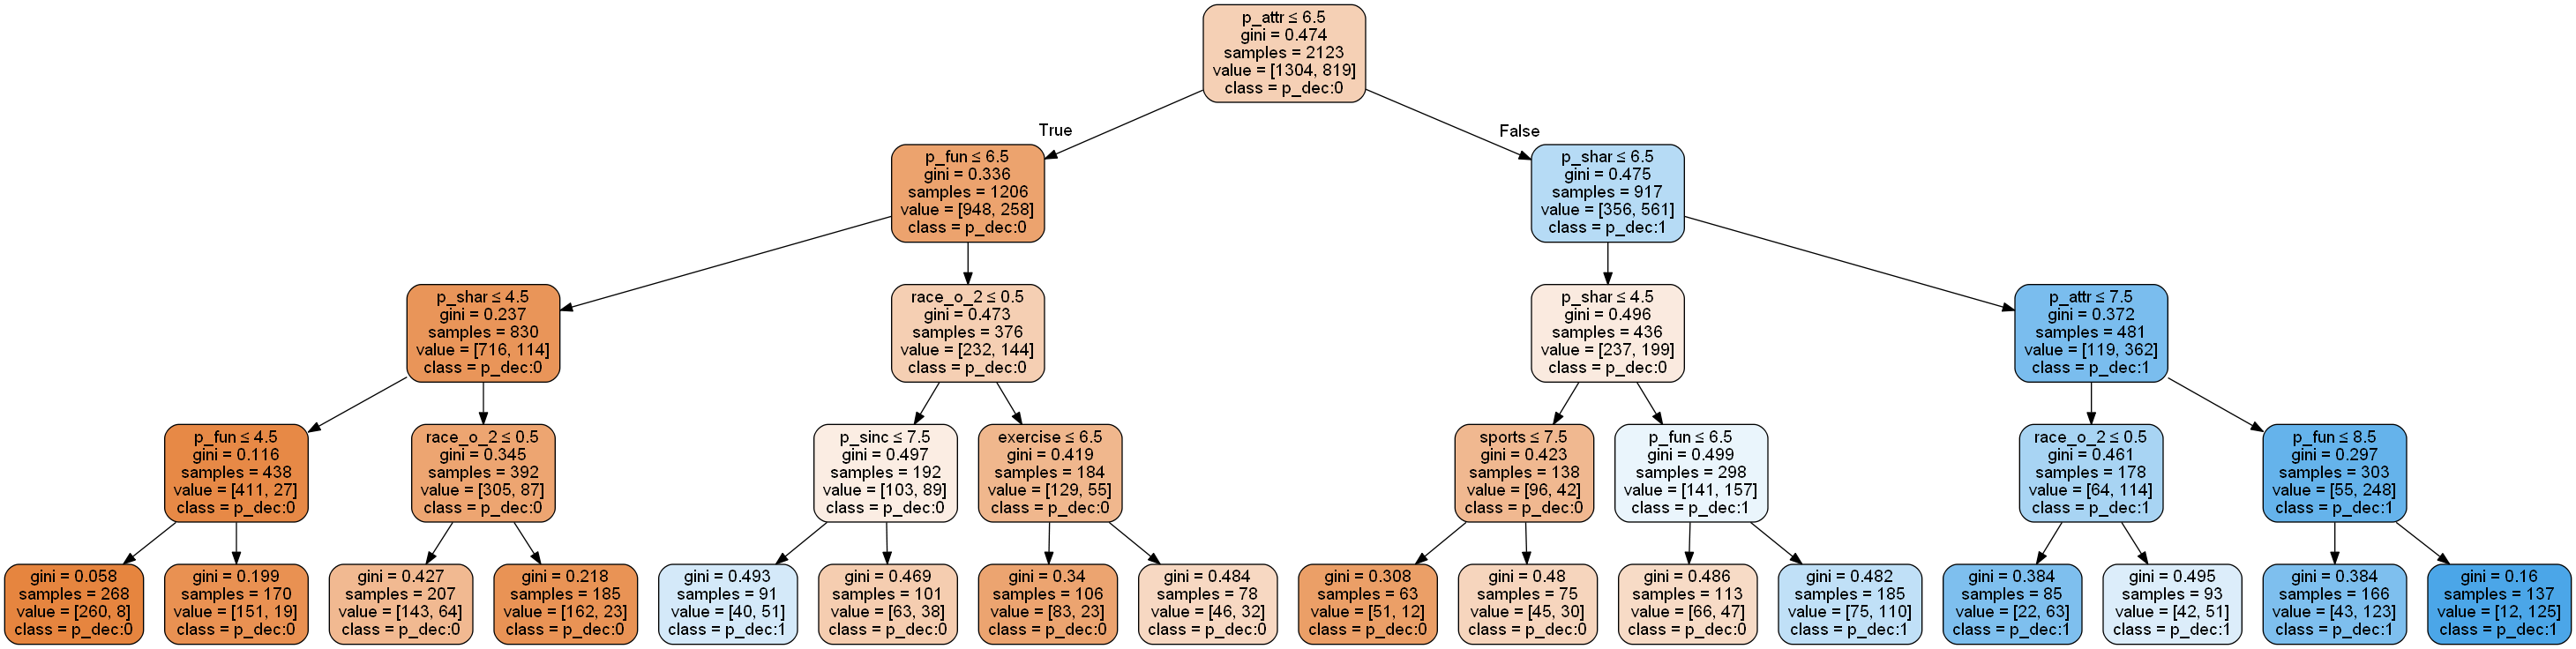

In [434]:
evaluation_dst_m, graph = model('MALE','决策树', DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 50))
graph

由以上结果可看出，**从女性视角看待与男性的约会**：

* 决定进一步发展最重要的前三个特征均为约会后的主观打分，即约会对象当场的表现非常重要，而在这三个特征中，最重要的是吸引力，其次是共同爱好、幽默，这部分与从男性视角看待女性的情况一致，而除此之外，女性还会关注男性的真诚度，而男性关注女性的智力；
* 决定进一步发展的另外两个特征为男性本身的具体兴趣爱好，其中锻炼、运动为轻微的加分项。
* 此外，非裔的女性总体上对待进一步发展会更谨慎。

#### 3.2.2 Boosting

In [377]:
evaluation_boost_f, graph = model('FEMALE','AdaBoosting', AdaBoostClassifier(n_estimators=70))
graph

FEMALE | 分类器在测试集上评估结果:
混淆矩阵:

 [[266  88]
 [ 77 277]]

Classification report:

               precision    recall  f1-score   support

           0       0.78      0.75      0.76       354
           1       0.76      0.78      0.77       354

   micro avg       0.77      0.77      0.77       708
   macro avg       0.77      0.77      0.77       708
weighted avg       0.77      0.77      0.77       708

                       accuracy  precision  recall      f1
AdaBoosting | FEMALE    0.7669     0.7589  0.7825  0.7705
降序显示分类器所用特征的重要性：
 1) p_attr                         0.157143
 2) age_o                          0.114286
 3) p_shar                         0.071429
 4) p_fun                          0.057143
 5) concerts                       0.057143
 6) imprelig                       0.057143
 7) p_amb                          0.057143
 8) date                           0.042857
 9) p_intel                        0.042857
10) p_sinc                         0.042857
11) shopping       

In [418]:
evaluation_boost_m, graph = model('MALE','AdaBoosting', AdaBoostClassifier(n_estimators=30))
graph

MALE | 分类器在测试集上评估结果:
混淆矩阵:

 [[371  71]
 [ 91 175]]

Classification report:

               precision    recall  f1-score   support

           0       0.80      0.84      0.82       442
           1       0.71      0.66      0.68       266

   micro avg       0.77      0.77      0.77       708
   macro avg       0.76      0.75      0.75       708
weighted avg       0.77      0.77      0.77       708

                     accuracy  precision  recall      f1
AdaBoosting | MALE    0.7712     0.7114  0.6579  0.6836
降序显示分类器所用特征的重要性：
 1) p_attr                         0.133333
 2) p_shar                         0.133333
 3) p_fun                          0.100000
 4) hiking                         0.066667
 5) race_o_2                       0.066667
 6) age_o                          0.066667
 7) gaming                         0.066667
 8) theater                        0.033333
 9) samerace                       0.033333
10) date                           0.033333
11) clubbing             

#### 3.2.3 随机森林

In [399]:
evaluation_rf_f, graph = model('FEMALE','随机森林', RandomForestClassifier(70))
graph

FEMALE | 分类器在测试集上评估结果:
混淆矩阵:

 [[260  94]
 [ 82 272]]

Classification report:

               precision    recall  f1-score   support

           0       0.76      0.73      0.75       354
           1       0.74      0.77      0.76       354

   micro avg       0.75      0.75      0.75       708
   macro avg       0.75      0.75      0.75       708
weighted avg       0.75      0.75      0.75       708

                accuracy  precision  recall      f1
随机森林 | FEMALE    0.7514     0.7432  0.7684  0.7556
降序显示分类器所用特征的重要性：
 1) p_attr                         0.177598
 2) p_shar                         0.083479
 3) p_fun                          0.082365
 4) age_o                          0.047122
 5) age_diff                       0.047076
 6) p_amb                          0.037564
 7) p_intel                        0.035889
 8) p_sinc                         0.034159
 9) age                            0.024331
10) tv                             0.023197
11) yoga                         

In [426]:
evaluation_rf_m, graph = model('MALE','随机森林', RandomForestClassifier(70))
graph

MALE | 分类器在测试集上评估结果:
混淆矩阵:

 [[372  70]
 [ 98 168]]

Classification report:

               precision    recall  f1-score   support

           0       0.79      0.84      0.82       442
           1       0.71      0.63      0.67       266

   micro avg       0.76      0.76      0.76       708
   macro avg       0.75      0.74      0.74       708
weighted avg       0.76      0.76      0.76       708

              accuracy  precision  recall      f1
随机森林 | MALE    0.7627     0.7059  0.6316  0.6667
降序显示分类器所用特征的重要性：
 1) p_attr                         0.118067
 2) p_shar                         0.098173
 3) p_fun                          0.088177
 4) age_diff                       0.046421
 5) age_o                          0.043467
 6) p_sinc                         0.040390
 7) p_intel                        0.033613
 8) p_amb                          0.032961
 9) hiking                         0.023637
10) concerts                       0.023479
11) gaming                         0.02

#### 3.2.4 SVM

In [408]:
evaluation_svm_f, graph = model('FEMALE','SVM', SVC(kernel = 'linear'))
graph

FEMALE | 分类器在测试集上评估结果:
混淆矩阵:

 [[259  95]
 [ 82 272]]

Classification report:

               precision    recall  f1-score   support

           0       0.76      0.73      0.75       354
           1       0.74      0.77      0.75       354

   micro avg       0.75      0.75      0.75       708
   macro avg       0.75      0.75      0.75       708
weighted avg       0.75      0.75      0.75       708

               accuracy  precision  recall      f1
SVM | FEMALE      0.75     0.7411  0.7684  0.7545
降序显示分类器所用特征的重要性：
此方法不支持输出特征重要性。
此方法不支持可视化。


In [427]:
evaluation_svm_m, graph = model('MALE','SVM', SVC(kernel = 'linear'))
graph

MALE | 分类器在测试集上评估结果:
混淆矩阵:

 [[377  65]
 [ 93 173]]

Classification report:

               precision    recall  f1-score   support

           0       0.80      0.85      0.83       442
           1       0.73      0.65      0.69       266

   micro avg       0.78      0.78      0.78       708
   macro avg       0.76      0.75      0.76       708
weighted avg       0.77      0.78      0.77       708

             accuracy  precision  recall      f1
SVM | MALE    0.7768     0.7269  0.6504  0.6865
降序显示分类器所用特征的重要性：
此方法不支持输出特征重要性。
此方法不支持可视化。


#### 3.2.5 方法比较

In [432]:
pd.concat([evaluation_dst_f, evaluation_dst_m, evaluation_boost_f, evaluation_boost_m, 
           evaluation_rf_f, evaluation_rf_m, evaluation_svm_f, evaluation_svm_m])

,accuracy,precision,recall,f1
决策树 | FEMALE,0.7627,0.7719,0.7458,0.7586
决策树 | MALE,0.7500,0.6773,0.6391,0.6576
AdaBoosting | FEMALE,0.7669,0.7589,0.7825,0.7705
AdaBoosting | MALE,0.7712,0.7114,0.6579,0.6836
随机森林 | FEMALE,0.7514,0.7432,0.7684,0.7556
随机森林 | MALE,0.7627,0.7059,0.6316,0.6667
SVM | FEMALE,0.7500,0.7411,0.7684,0.7545
SVM | MALE,0.7768,0.7269,0.6504,0.6865


在此数据集上，四种方法表现差不多。

## > Part 4：总结

> **男性与女性的本身具有的差异:**
* 男性与女性对职业选择的倾向、在从事领域的分布上有非常大的差异，如business、MBA、engineering等领域内绝大部分为男性，而social work、psychology、education等领域内绝大部分为女性。  
* 在决定进一步发展的相亲成员中，男方年龄比女方大是更常见的情况。总体来说，女性更倾向于年龄相近的对象，不是特别需要男方比自己年长，男性则更加倾向与年龄比自己小的约会对象进一步发展。

> **怎样的男性与女性在相亲中更容易获得进一步发展的机会？**
* 由于男女自身特质的差异、以及相亲中对于对方期望的差异，因此对男性与女性“怎样的特质在相亲中更容易获得进一步发展的机会？”分别进行建模。
* 从男性视角看待与女性的约会：
    * 决定进一步发展最重要的前四个特征均为约会后的主观打分，即约会对象当场的表现非常重要，而在这四个特征中，最重要的是吸引力，其次是共同爱好、幽默、智力；
    * 决定进一步发展的后三个特征为女性本身的具体兴趣爱好，其中爱看电视、逛夜店为减分项，徒步旅行为轻微的加分项。
* 从女性视角看待与男性的约会：
    * 决定进一步发展最重要的前三个特征均为约会后的主观打分，即约会对象当场的表现非常重要，而在这三个特征中，最重要的是吸引力，其次是共同爱好、幽默，这部分与从男性视角看待女性的情况一致，而除此之外，女性还会关注男性的真诚度，而男性关注女性的智力；
    * 决定进一步发展的另外两个特征为男性本身的具体兴趣爱好，其中锻炼、运动为轻微的加分项。
    * 此外，非裔的女性总体上对待进一步发展会更谨慎。